## Loan Prediction Model Project

### Problem Statement
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

Some Factors that can affect loan approval:
1) Applicant's Salary
2) Credit history
3) Applicant's Loan Amount
4) Loan Term
5) EMI (Equated Monthly Installment)

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
train = pd.read_csv("C:/Users/ashir/OneDrive/Documents/train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("C:/Users/ashir/OneDrive/Documents/test_Y3wMUE5_7gLdaTN.csv")

# Creating copies of original datasets
train_original = train.copy()
test_original = test.copy()

In [3]:
# Data Exploration - Understanding the Dataset
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

# Understanding the columns in Train dataset
print("\nColumns in Train dataset:")
print(train.columns)

# Understanding the columns in Test dataset
print("\nColumns in Test dataset:")
print(test.columns)

Train dataset shape: (614, 13)
Test dataset shape: (367, 12)

Columns in Train dataset:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Columns in Test dataset:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [4]:
# Finding out the data types of each variable
print("\nData types in Train dataset:")
print(train.dtypes)

# Looking at the shapes of the train and test datasets
print("\nTrain dataset shape:", train.shape)
print("Test dataset shape:", test.shape)


Data types in Train dataset:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Train dataset shape: (614, 13)
Test dataset shape: (367, 12)


In [5]:
# Looking at the target variable
print("\nLoan_Status value counts:")
print(train['Loan_Status'].value_counts())

# Normalize to get proportions
print("\nLoan_Status value proportions:")
print(train['Loan_Status'].value_counts(normalize=True))


Loan_Status value counts:
Loan_Status
Y    422
N    192
Name: count, dtype: int64

Loan_Status value proportions:
Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


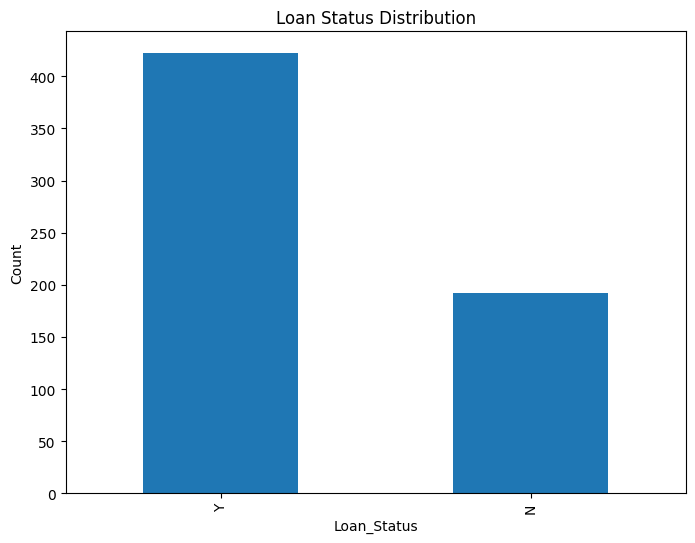

In [6]:
# Plotting a bar plot for Loan_Status value counts
plt.figure(figsize=(8, 6))
train['Loan_Status'].value_counts().plot.bar()
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution')
plt.show()

In [7]:
# Categorizing Variables
print("\nCategorizing Variables:")
print("Categorical Features: Gender, Married, Self_Employed, Credit_History, Loan_Status")
print("Ordinal Features: Dependents, Education, Property_Area")
print("Numerical Features: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term")


Categorizing Variables:
Categorical Features: Gender, Married, Self_Employed, Credit_History, Loan_Status
Ordinal Features: Dependents, Education, Property_Area
Numerical Features: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term


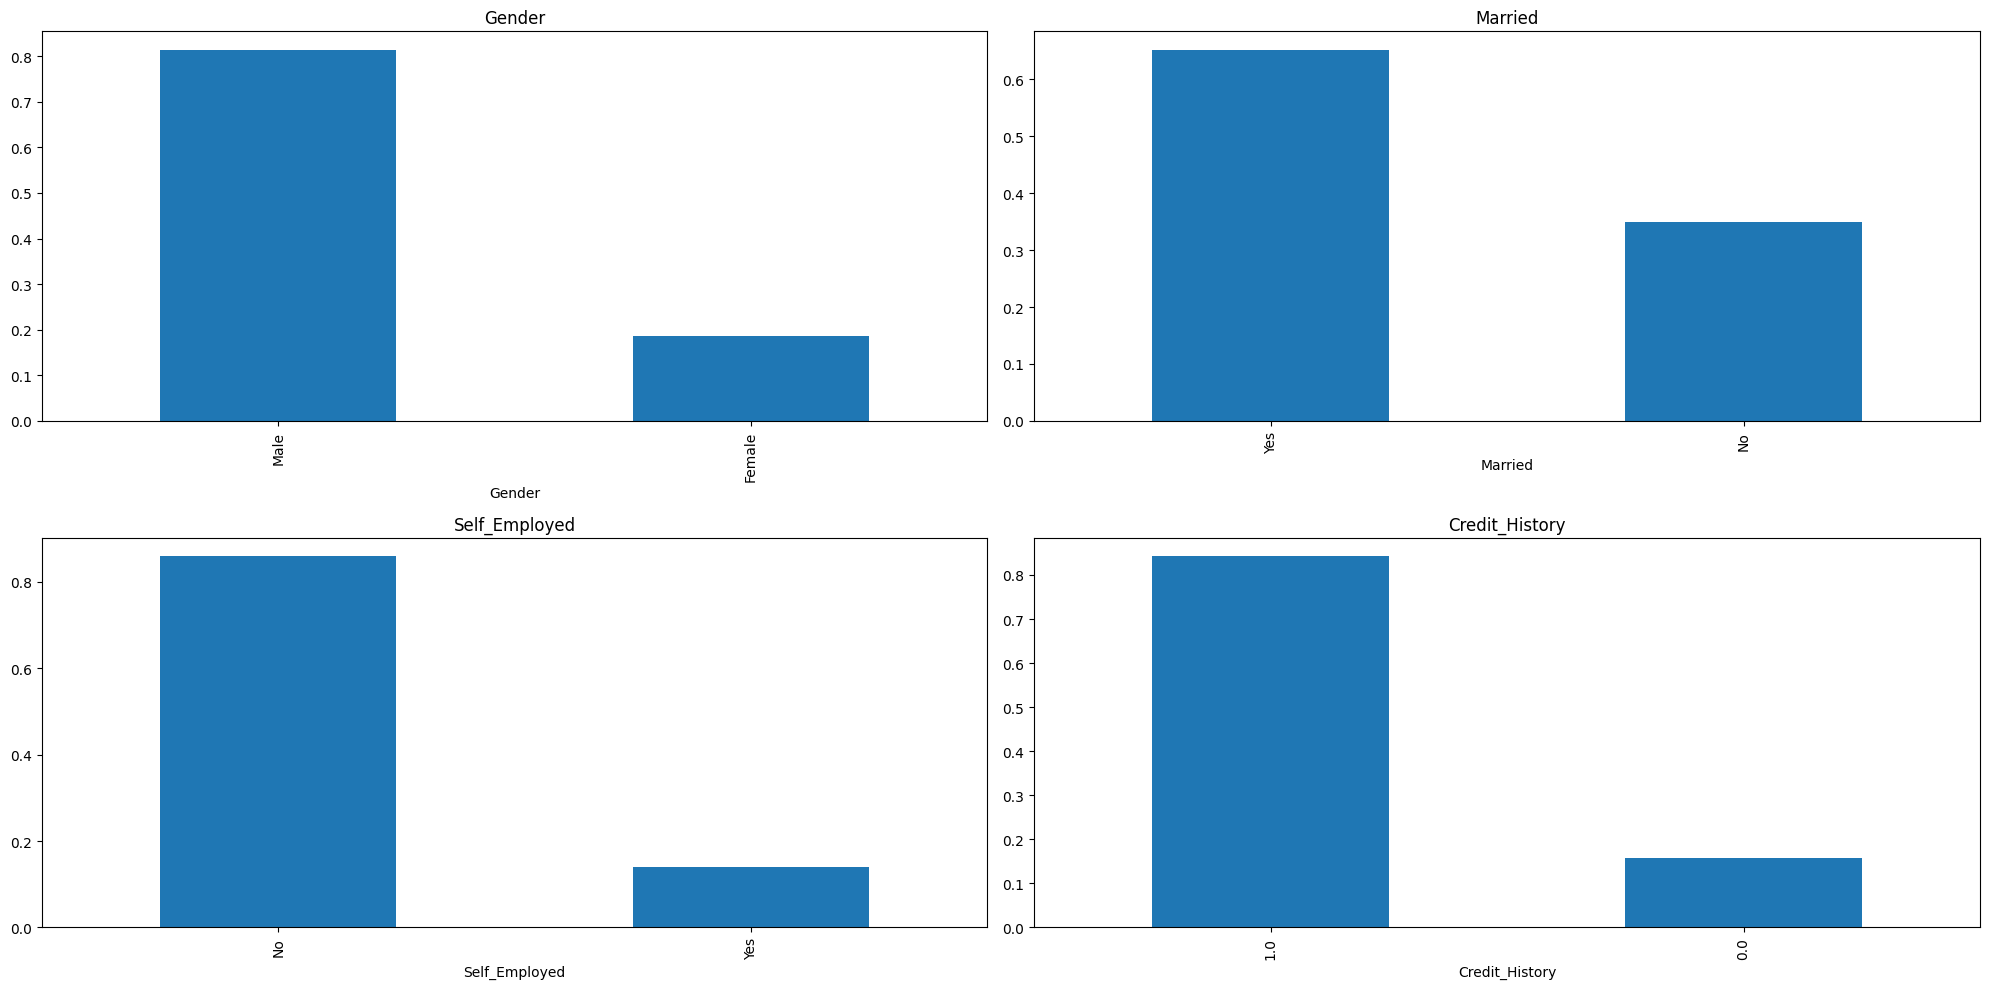

In [8]:
# Visualizing all the categorical variables
plt.figure(figsize=(20, 10))

plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

plt.tight_layout()
plt.show()

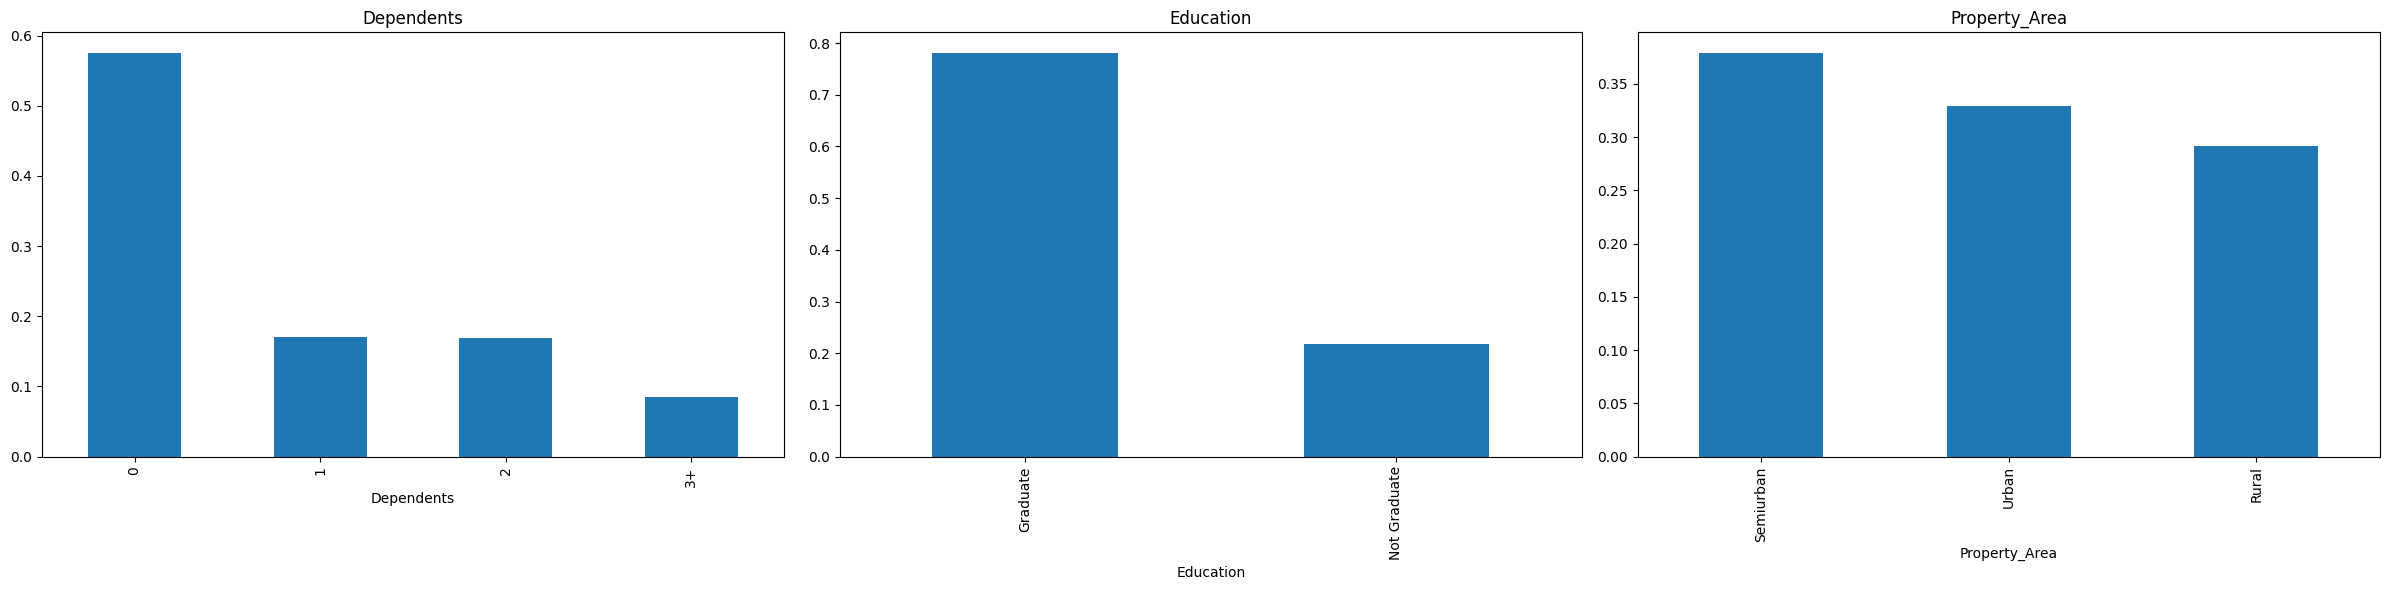

In [9]:
# Visualizing all the ordinal variables
plt.figure(figsize=(20, 10))

plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24, 6), title='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

plt.tight_layout()
plt.show()

In [10]:
# Some inferences from the visualizations
print("\nInferences from visualizations:")
print("1. Most of the applicants don't have dependents")
print("2. Around 80% of the applicants are graduate")
print("3. Most of the applicants are from the semi-urban areas")


Inferences from visualizations:
1. Most of the applicants don't have dependents
2. Around 80% of the applicants are graduate
3. Most of the applicants are from the semi-urban areas


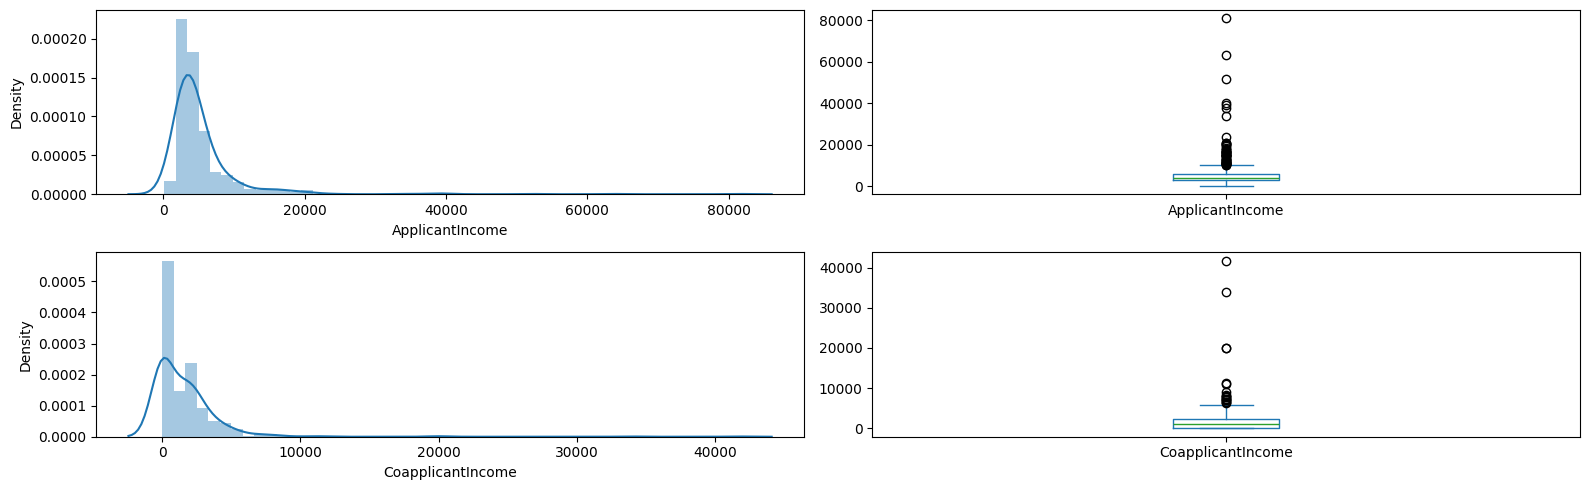

In [11]:
# Visualizing all the numerical variables
plt.figure(figsize=(16, 12))

plt.subplot(221)
sns.distplot(train['ApplicantIncome'])
plt.subplot(222)
train['ApplicantIncome'].plot.box(figsize=(16, 5))

plt.subplot(223)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(224)
train['CoapplicantIncome'].plot.box(figsize=(16, 5))

plt.tight_layout()
plt.show()

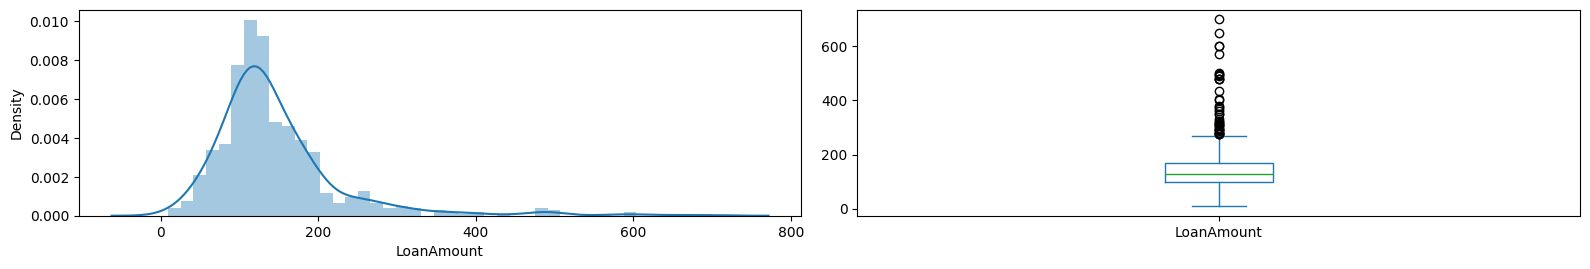

In [12]:
# Distribution of the LoanAmount variable
plt.figure(figsize=(16, 10))

plt.subplot(221)
sns.distplot(train['LoanAmount'])
plt.subplot(222)
train['LoanAmount'].plot.box(figsize=(16, 5))

plt.tight_layout()
plt.show()


Bivariate Analysis - Analyzing relationships with target variable


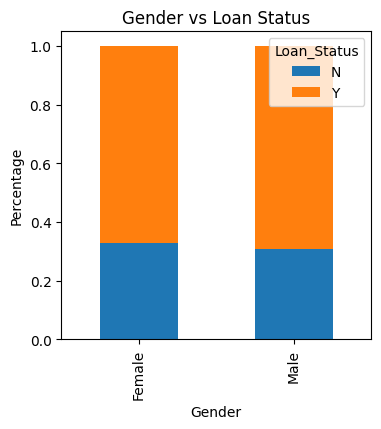

Based on the visualization, we can infer that there is almost no difference in the proportion of loan approvals based on Gender.


In [13]:
# Bivariate Analysis - Analyzing the different variables with the Target Variable
print("\nBivariate Analysis - Analyzing relationships with target variable")

# Looking at the relationship between gender and Loan approvals
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4, 4))
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender vs Loan Status')
plt.show()

print("Based on the visualization, we can infer that there is almost no difference in the proportion of loan approvals based on Gender.")

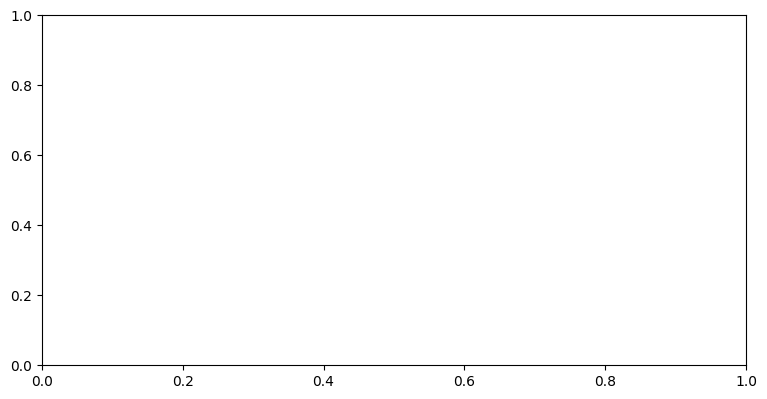

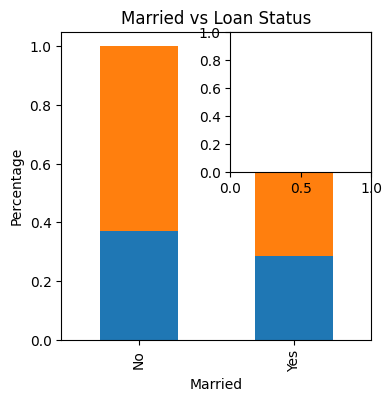

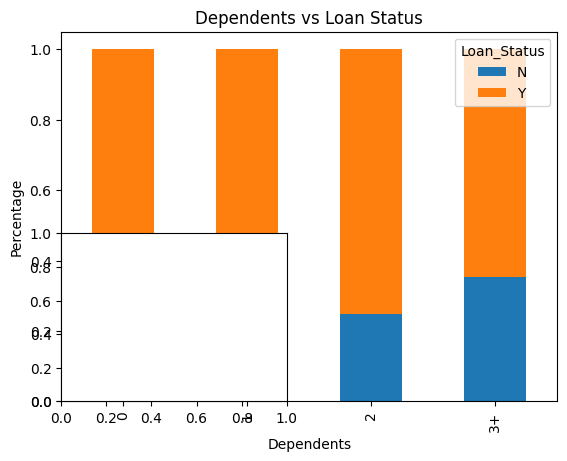

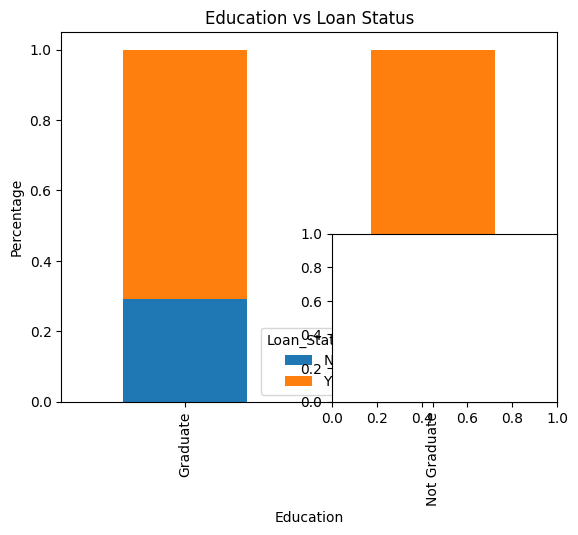

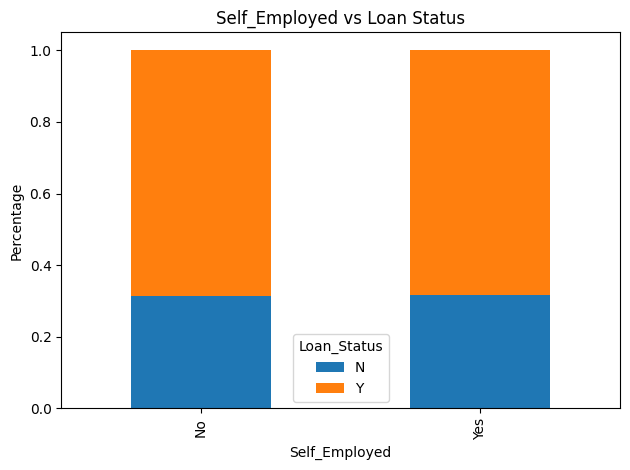

In [14]:
# Visualizing the relationships between different categorical variables and Loan_Status
plt.figure(figsize=(20, 10))

# Create crosstabs
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])

# Create stacked bar plots
plt.subplot(221)
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4, 4))
plt.xlabel('Married')
plt.ylabel('Percentage')
plt.title('Married vs Loan Status')

plt.subplot(222)
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
plt.ylabel('Percentage')
plt.title('Dependents vs Loan Status')

plt.subplot(223)
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.title('Education vs Loan Status')

plt.subplot(224)
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Self_Employed')
plt.ylabel('Percentage')
plt.title('Self_Employed vs Loan Status')

plt.tight_layout()
plt.show()

In [15]:
print("\nInsights from the above bar plots:")
print("1. Proportion of married applicants is higher for the approved loans.")
print("2. Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.")
print("3. There is nothing significant we can infer from Self_Employed vs Loan_Status plot.")


Insights from the above bar plots:
1. Proportion of married applicants is higher for the approved loans.
2. Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
3. There is nothing significant we can infer from Self_Employed vs Loan_Status plot.


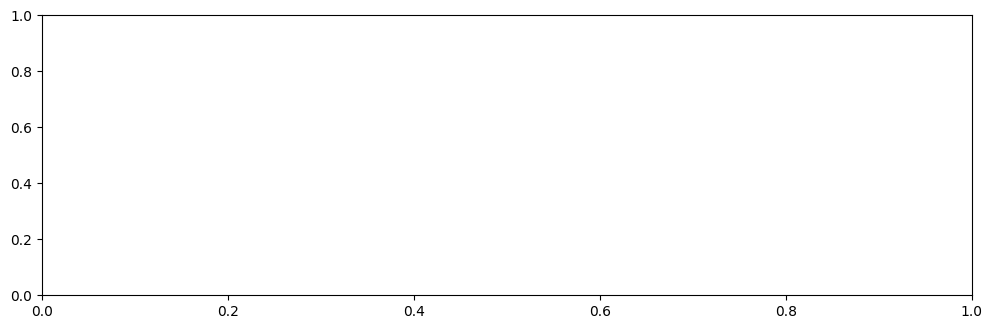

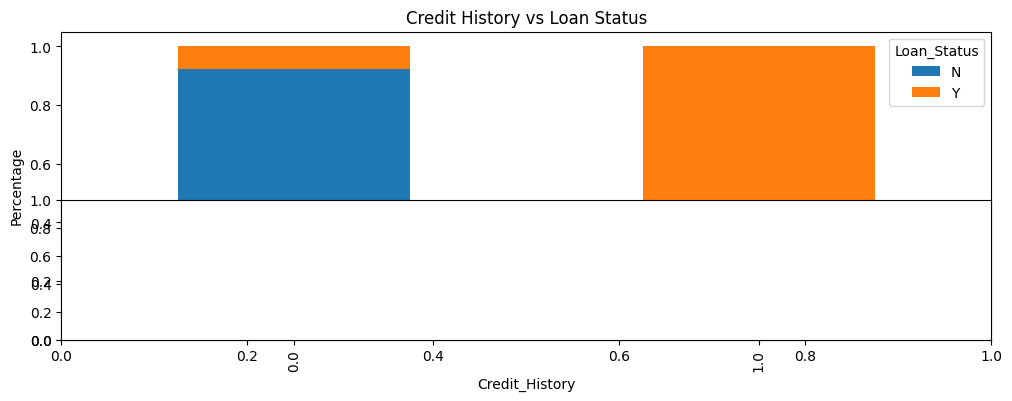

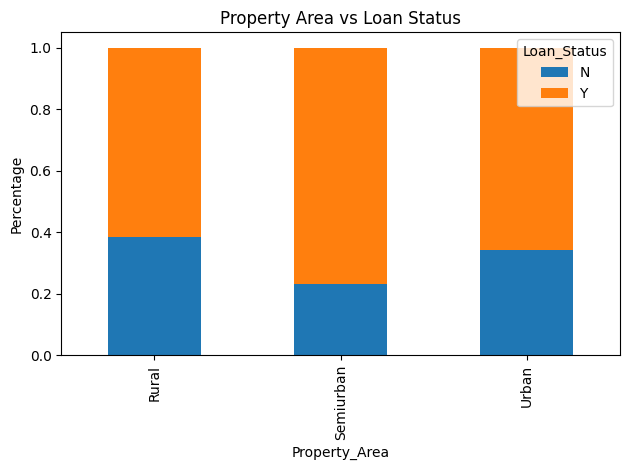

In [16]:
# Visualizing the relationship between Credit_History and Property_Area with Loan_Status
plt.figure(figsize=(12, 8))

# Create crosstabs
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])

# Plot Credit History vs Loan Status
plt.subplot(211)
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(12, 4))
plt.xlabel('Credit_History')
plt.ylabel('Percentage')
plt.title('Credit History vs Loan Status')

# Plot Property Area vs Loan Status
plt.subplot(212)
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
plt.ylabel('Percentage')
plt.title('Property Area vs Loan Status')

plt.tight_layout()
plt.show()

In [17]:
print("\nInsights:")
print("1. It seems people with credit history as 1 are more likely to get their loans approved.")
print("2. Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.")


Insights:
1. It seems people with credit history as 1 are more likely to get their loans approved.
2. Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.


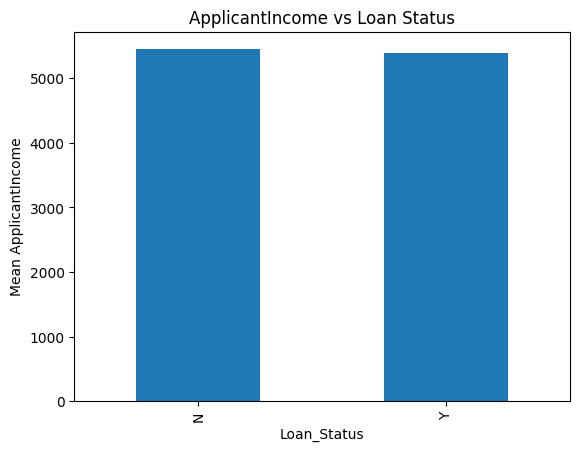

In [18]:
# Visualizing the relationship between ApplicantIncome and Loan_Status
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.xlabel('Loan_Status')
plt.ylabel('Mean ApplicantIncome')
plt.title('ApplicantIncome vs Loan Status')
plt.show()

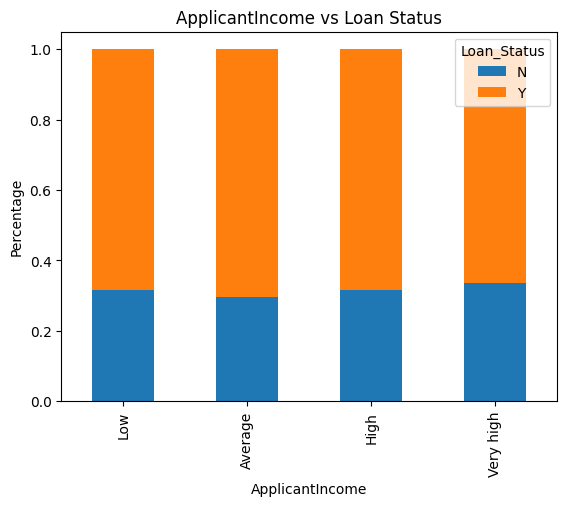

In [19]:
# Visualizing the relationship between Applicant Income and Loan Status using binning
# Define bins and labels for income groups
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very high']

# Create income bins
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels=group)

# Create crosstab of Income bins vs Loan_Status
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])

# Create stacked bar plot
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.title('ApplicantIncome vs Loan Status')
plt.show()

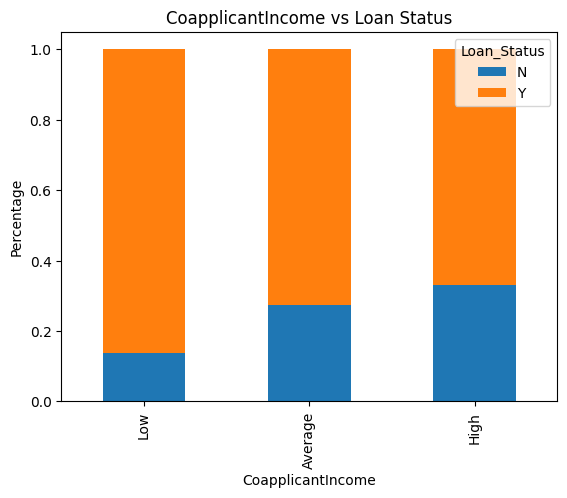

In [20]:
# Visualizing the relationship between CoapplicantIncome and Loan_Status
# Define bins and labels for coapplicant income
bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']

# Create coapplicant income bins
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)

# Create crosstab
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])

# Create stacked bar plot
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.title('CoapplicantIncome vs Loan Status')
plt.show()

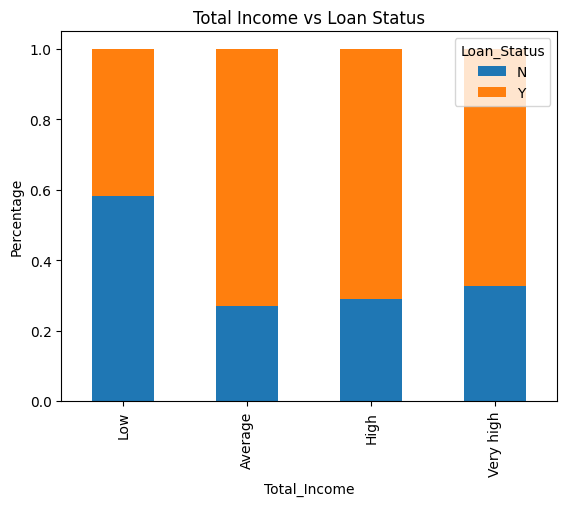

In [21]:
# Visualizing the relationship between total income and Loan_Status
# Create Total_Income by combining Applicant and Coapplicant Income
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

# Define bins and labels for total income groups
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very high']

# Create total income bins
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)

# Create crosstab and plot
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.title('Total Income vs Loan Status')
plt.show()

In [22]:
print("Insight - The proportion of loans being approved for low total income applicants and co-applicants are lower than that have Average, High and Very High Total income")

Insight - The proportion of loans being approved for low total income applicants and co-applicants are lower than that have Average, High and Very High Total income


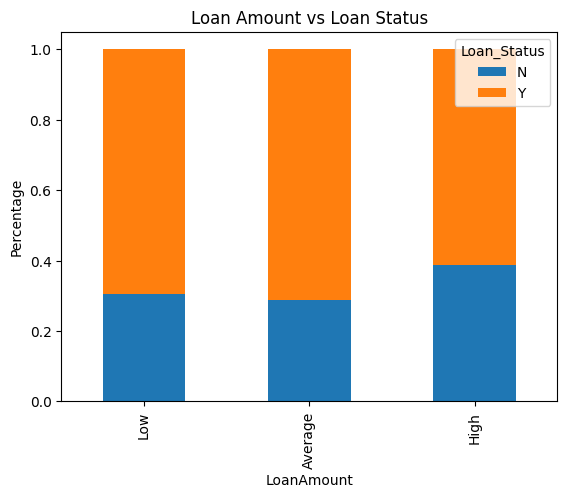

In [23]:
# Visualizing the relationship between LoanAmount and Loan_Status
# Define bins and labels for loan amount groups
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']

# Create loan amount bins
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels=group)

# Create crosstab and plot
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.title('Loan Amount vs Loan Status')
plt.show()

In [24]:
# Drop the binned columns created for exploration
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [25]:
# Missing Value Imputation
# Finding out the number of nulls in each of the variables
print("\nMissing values in each column:")
print(train.isnull().sum())


Missing values in each column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [26]:
# Fill missing values with mode for categorical variables
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [27]:
# Fill Loan_Amount_Term with mode
print("\nLoan_Amount_Term value counts:")
print(train['Loan_Amount_Term'].value_counts())
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)


Loan_Amount_Term value counts:
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


In [28]:
# Fill LoanAmount with median
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [29]:
# Check if all missing values are filled
print("\nRemaining missing values after imputation:")
print(train.isnull().sum())


Remaining missing values after imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [30]:
# Apply same preprocessing to test dataset
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [31]:
# Convert '3+' to 3 in Dependents column for both train and test sets
train['Dependents'] = train['Dependents'].replace('3+', 3, inplace=False)
test['Dependents'] = test['Dependents'].replace('3+', 3, inplace=False)

In [32]:
# Convert Loan_Status categories to numeric (N=0, Y=1)
train['Loan_Status'] = train['Loan_Status'].replace('N', 0, inplace=False)
train['Loan_Status'] = train['Loan_Status'].replace('Y', 1, inplace=False)

In [33]:
# Feature Engineering - Create log transformation of LoanAmount
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

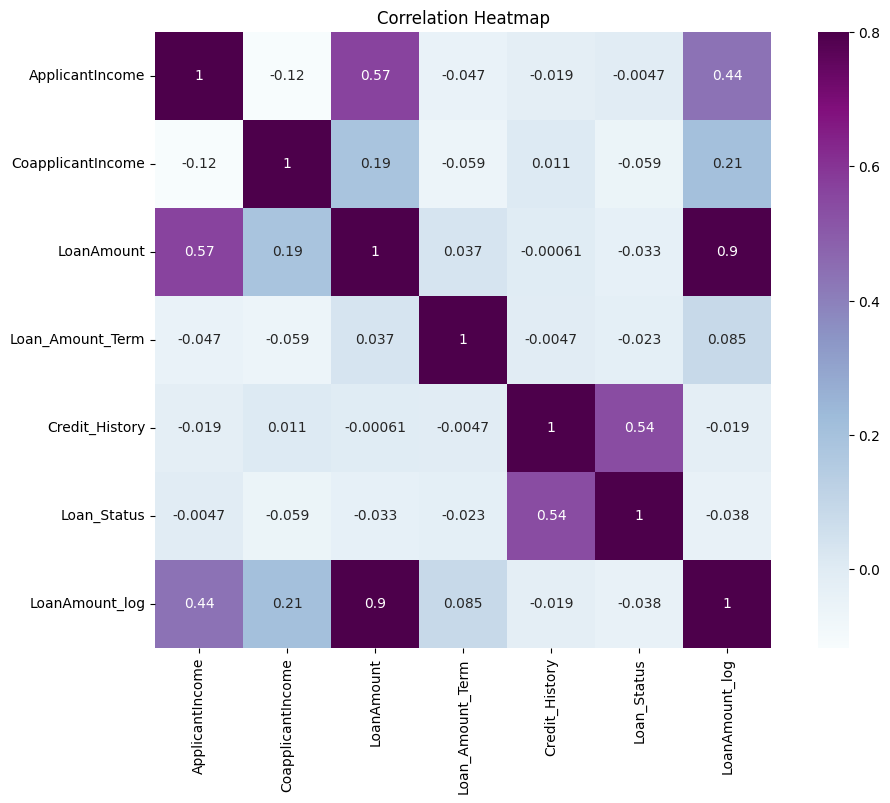

In [34]:
# Correlation Analysis
# Select only numeric columns for correlation
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, vmax=.8, square=True, cmap="BuPu", annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [35]:
# Model Building
# Separate features and target
X = train.drop('Loan_Status', axis=1)  # Features
y = train.Loan_Status  # Target

# Create dummy variables for categorical features
X = pd.get_dummies(X)
test = pd.get_dummies(test)

# Make sure X and test have the same columns (important for prediction later)
# Find missing columns in test
missing_cols = set(X.columns) - set(test.columns)
# Add missing columns to test with default value of 0
for col in missing_cols:
    test[col] = 0
# Ensure columns are in the same order
test = test[X.columns]

In [36]:
# Import required libraries for modeling
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [37]:
# Split data into training and validation sets
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:
# Standardize numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'LoanAmount_log']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_cv[numerical_features] = scaler.transform(X_cv[numerical_features])

In [39]:
# Train a logistic regression model
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

# Make predictions on validation set
pred_cv = model.predict(X_cv)

# Calculate accuracy
accuracy = accuracy_score(y_cv, pred_cv)
print(f"\nLogistic Regression Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.7946


In [40]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_cv, pred_cv))

# Print confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_cv, pred_cv)
print(cm)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.41      0.57        61
           1       0.77      0.98      0.87       124

    accuracy                           0.79       185
   macro avg       0.85      0.70      0.72       185
weighted avg       0.82      0.79      0.77       185


Confusion Matrix:
[[ 25  36]
 [  2 122]]


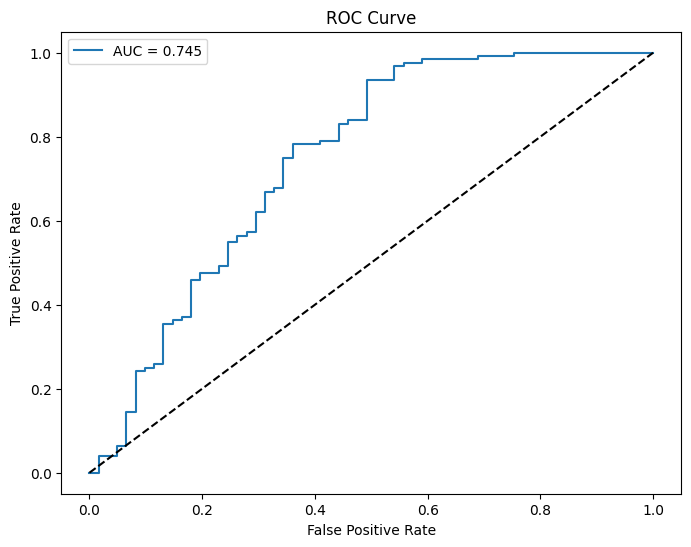

In [41]:
# Calculate and plot ROC curve
y_pred_proba = model.predict_proba(X_cv)[:,1]
fpr, tpr, _ = roc_curve(y_cv, y_pred_proba)
auc = roc_auc_score(y_cv, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [42]:
# Cross-validation for model robustness
print("\nCross-Validation Results (5-fold):")
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
cv_scores = []

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"\nFold {i+1} of {kf.n_splits}")
    
    # Split data
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    # Standardize features
    xtr[numerical_features] = scaler.fit_transform(xtr[numerical_features])
    xvl[numerical_features] = scaler.transform(xvl[numerical_features])
    
    # Train model
    model.fit(xtr, ytr)
    
    # Make predictions
    pred = model.predict(xvl)
    score = accuracy_score(yvl, pred)
    cv_scores.append(score)
    print(f'Accuracy: {score:.4f}')

print(f"\nMean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Cross-Validation Results (5-fold):

Fold 1 of 5
Accuracy: 0.8130

Fold 2 of 5
Accuracy: 0.8374

Fold 3 of 5
Accuracy: 0.7967

Fold 4 of 5
Accuracy: 0.8211

Fold 5 of 5
Accuracy: 0.8033

Mean CV Accuracy: 0.8143
Standard Deviation: 0.0142


In [43]:
# Compare different models
print("\nComparing Different Models:")

models = {
    "Logistic Regression": LogisticRegression(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1)
}

for name, model in models.items():
    cv_results = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {cv_results.mean():.4f}, Std Dev = {cv_results.std():.4f}")


Comparing Different Models:
Logistic Regression: Mean Accuracy = 0.7981, Std Dev = 0.0248
Random Forest: Mean Accuracy = 0.7948, Std Dev = 0.0252
Gradient Boosting: Mean Accuracy = 0.8062, Std Dev = 0.0268


In [44]:
# Train the best model on full training data
best_model = GradientBoostingClassifier(random_state=1)  # Assuming GB performs best
best_model.fit(X, y)

# Standardize test data numerical features
test[numerical_features] = scaler.transform(test[numerical_features])

In [48]:
# Make predictions on test data
test_predictions = best_model.predict(test)
test_pred_proba = best_model.predict_proba(test)[:,1]

# Create submission DataFrame
submission = pd.DataFrame({
    'Loan_ID': test_original['Loan_ID'],
    'Loan_Status': test_predictions
})

# Convert numeric predictions back to Y/N format
submission['Loan_Status'] = submission['Loan_Status'].replace({0: 'N', 1: 'Y'})

# Print sample of predictions
print("\nSample Predictions:")
print(submission.head())


Sample Predictions:
    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           N
